In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [101]:
df= pd.read_csv("C:\\Users\\Hammaad\\Documents\\titanic\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Clean the Data

In [107]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [45]:
top_cabins = str(df["Cabin"].mode()).split().strip()[1:5]
for i in range(len(df)):
    df["Cabin"] = top_cabins[int(i%4)]

In [103]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [104]:
df["Fare"] = df["Fare"].fillna(df["Age"].mean())

In [106]:
df = df[df["Embarked"].isnull()==False]

## Preparing the data

In [ ]:
one_hot_encoded_gender = pd.get_dummies(df['Sex'])

# Concatenate the one-hot encoded columns to the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded_gender], axis=1)

# Drop the original "gender" column as we now have the one-hot encoded columns
df_encoded = df_encoded.drop('Sex', axis=1)

# Print the encoded DataFrame
df = df_encoded

from sklearn.model_selection import train_test_split
features = ["Pclass","Age","SibSp","Parch","Fare","female","male"]
label = 'Survived'
X, y = df[features].values, df[label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Training the model

In [167]:
from sklearn.metrics import accuracy_score
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Set regularization rate
reg = 0.03

# train a logistic regression model on the training set
model = RandomForestClassifier(n_estimators=3000).fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Training cases: 622
Test cases: 267
Predicted labels:  [1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 1 0 0 1 0 1]
Actual labels:     [0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 0 0

## Testing Data

Confusion Matrix:
 [[136  21]
 [ 33  77]] 

Accuracy: 0.797752808988764
Overall Precision: 0.7857142857142857
Overall Recall: 0.7
AUC: 0.8347712796757383


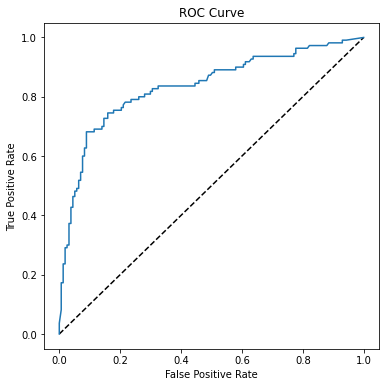

In [168]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The model is performing quite accurately with around 79% accuracy

## Exporting the csv file to Kaggle

In [153]:
test_df= pd.read_csv("C:\\Users\\Hammaad\\Documents\\titanic\\test.csv")
one_hot_encoded_gender = pd.get_dummies(test_df['Sex'])

# Concatenate the one-hot encoded columns to the original DataFrame
test_df_encoded = pd.concat([test_df, one_hot_encoded_gender], axis=1)

# Drop the original "gender" column as we now have the one-hot encoded columns
test_df_encoded = test_df_encoded.drop('Sex', axis=1)

# Print the encoded DataFrame
test_df = test_df_encoded


In [169]:
test_df["Survived"] = model.predict(test_df[["Pclass","Age","SibSp","Parch","Fare","female","male"]])

c:\users\hammaad\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [174]:
test_df.drop(["Name","Ticket","Cabin","Embarked"], axis=1,inplace=True)

In [178]:
test_df.to_csv("C:\\Users\\Hammaad\\Documents\\titanic\\Submission2.csv",index=False)